In [159]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain
from langchain.prompts import PromptTemplate
from langchain.prompts.chat import HumanMessagePromptTemplate
from langchain_ollama.llms import OllamaLLM
from langchain.schema import HumanMessage, SystemMessage
import ollama
from langchain.load.dump import dumps

In [160]:
# Loading The LLM (Language Model)
llm = OllamaLLM(model="llama3.1", base_url="http://127.0.0.1:11434")

# Install docker

[Docker ubuntu](https://docs.docker.com/engine/install/ubuntu/#install-using-the-repository)

## Create Database in docker container
```
docker run --name my-mysql -e MYSQL_ROOT_PASSWORD=my-secret-pw -e MYSQL_DATABASE=mydb -d mysql:latest
```
# Access the MySql shell
```
docker exec -it my-mysql bash
```
```
mysql -u root -p
```

Enter password: my-secret-pw
```
USE agency_db; 
```
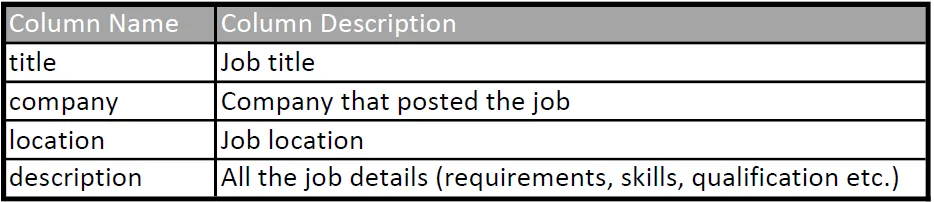
```
CREATE TABLE job_details (
  title TEXT NOT NULL,
  company TEXT NOT NULL,
  location TEXT NOT NULL,
  description TEXT NOT NULL
);
```
```
INSERT INTO job_details (title, company, location, description) 
VALUES 

('Engineer', 'Intel', 'GDC', 'Lorem ipsum dolor sit amet, consectetur adipiscing elit,

 sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud 
 
exercitation ullamco laboris '),

('Technitian', 'Intel', 'Concord', 'Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium,

 totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et');
 ```

In [161]:
#Connection to a containerize SQL database.ResourceWarning 
host = 'localhost'
port = '3306'
username = 'root'
password = 'my-secret-pw'
database_schema = 'agency_db'
mysql_uri = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database_schema}"

db = SQLDatabase.from_uri(mysql_uri, include_tables=['job_details'],sample_rows_in_table_info=2)

db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

LangChain is a framework designed to help developers build applications that leverage large language models (LLMs) like GPT in a more powerful and flexible way. 

It provides various components to build workflows for tasks such as document processing, chatbots, question answering, and more by connecting LLMs with external data sources, APIs, and tools. 

It enables users to work with not only single LLM calls but to create chains of LLM calls, allowing for more complex and nuanced behavior.

Key Features of LangChain

## Chains:

Chains are sequences of calls to LLMs or other computations, allowing for structured workflows. 

For example, one chain could take a user query, process it through an LLM, and then perform a search in a database, 

while another could involve generating code snippets from a prompt and executing them.

## Agents:

Agents are a core feature in LangChain that allows an LLM to make decisions in real 

time by interacting with tools such as search engines, APIs, databases, or other models. 

For instance, an agent could decide which external tool to use based on the prompt.

## Memory:

Memory allows models to keep track of information across multiple interactions or steps in a chain, 

enabling contextual understanding.
 This is particularly useful for chatbots or long-running conversations where maintaining context is essential.


## Connectors:

LangChain provides integrations with APIs, document loaders, and other external tools 

(e.g., SQL databases, Google Search, and other custom APIs), making it possible to enhance LLM capabilities by providing additional data or instructions from external resources.

Prompt Templates:

LangChain offers an easy way to define and manage complex prompt templates, 

which are essential for giving LLMs the right instructions or structuring information for optimal performance.

Use Cases:

Question Answering: LangChain can help build apps that take in queries and produce answers from a variety of sources 

(e.g., documentation, websites, databases).

Chatbots: With memory, you can create sophisticated conversational agents that maintain context across conversations.

Code Generation: Automate the process of writing and running code by connecting an LLM to a code execution environment.

Text Summarization: Generate summaries of long documents by feeding them into an LLM in a structured way.


In [162]:
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

# LangChain Ecosystem
LangChain integrates with several key components and tools, such as:

- Document Loaders (e.g., PDFs, HTML)
- Databases (SQL databases, Elasticsearch)
- External APIs (Google Search, Wikipedia)
- LLMs (OpenAI, Anthropic, Hugging Face)
- Execution environments (to run code or interact with operating system tools)

In [163]:
def retrieve_from_db(query: str) -> str:
    db_context = db_chain(query)
    db_context = db_context['result'].strip()
    return db_context

# Prompts contruction

In [164]:
def generate(query: str) -> str:
    db_context = retrieve_from_db(query)
    
    system_message = """You are a professional representative of an employment agency.
        You have to answer user's queries and provide relevant information to help in their job search. 
        Example:
        
        Input:
        Where are the most number of jobs for an English Teacher in Canada?
        
        Context:
        The most number of jobs for an English Teacher in Canada is in the following cities:
        1. Ontario
        2. British Columbia
        
        Output:
        The most number of jobs for an English Teacher in Canada is in Toronto and British Columbia
        """
    
    human_qry_template = HumanMessagePromptTemplate.from_template(
        """Input:
        {human_input}
        
        Context:
        {db_context}
        
        Output:
        """
    )
    messages = [
      SystemMessage(content=system_message),
      human_qry_template.format(human_input=query, db_context=db_context)
    ]
   
    print(dumps(llm.generate(messages), pretty=True))

# Function generate interacts with the LLM and returns a response.

In [165]:
generate("Whats the most popular job in GDC")
# generate("Cual es el trabajo mas popular en GDC")



> Entering new SQLDatabaseChain chain...
Whats the most popular job in GDC
SQLQuery:Question: Whats the most popular job in GDC
SQLQuery: 
SELECT `title` FROM job_details WHERE `location` = 'GDC' GROUP BY `title` ORDER BY COUNT(`title`) DESC LIMIT 5
SQLResult: [('Engineer',)]
Answer:Question: Whats the most popular job in GDC
SQLQuery: SELECT `title` FROM job_details WHERE `location` = 'GDC' GROUP BY `title` ORDER BY COUNT(*) DESC LIMIT 1
> Finished chain.


TypeError: Object of type SystemMessage is not JSON serializable